
<a id='chap-tpumap'></a>

# Travaux pratiques - UMAP

(correspond à 1 séance de TP)

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  
- [Documentation UMAP-learn](https://umap-learn.readthedocs.io/)  



L’objectif de cette séance de TP est de présenter l’utilisation des
fonctionnalités de réduction de non-linéaire du paquet umap-learn
permettant de manipuler l’algorithme UMAP, ainsi que de donner une
meilleure compréhension de cette méthode et de l’influence de ses
paramètres principaux sur les résultats. Pour atteindre cet objectif,
nous allons examiner les résultats de plusieurs réductions de dimension
sur un jeu de données synthétique (le « gâteau roulé ») puis sur des
chiffres manuscrits.

## Installation du paquet `umap-learn`

Pour commencer cette séance de TP, il est indispensable de disposer
d’une installation fonctionnelle de Python et de scikit-learn mais aussi
du paquet `umap-learn`. Il peut s’installer à l’aide de la commande
`pip install umap-learn`, via Anaconda ou directement depuis Jupyter
via la commande magique ci-dessous :

In [3]:
%pip install umap-learn
import umap


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Expérimentations sur le gâteau roulé

Dans un premier temps, nous allons examiner le jeu de données du gâteau
roulé (le *Swiss Roll*). Il s’agit d’un jeu de données en trois
dimensions correspondant à une surface bidimensionnelle enroulée sur
elle-même.

In [32]:
# Import des bibliothèques utiles
import sklearn
import matplotlib.pyplot as plt

Le *swiss roll* est intégré dans scikit-learn, qui dispose d’une
fonction préfaite pour générer automatiquement un jeu de données suivant
cette distribution. Nous pouvons en produire une matrice d’observations
contenant 1500 exemples et les visualiser en 3D.

In [33]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
%matplotlib

X, color = make_swiss_roll(n_samples=1500)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, s=50, cmap=plt.cm.Spectral)
ax.set_title("Représentation 3D graphique du swiss roll dataset")
plt.show()


Using matplotlib backend: TkAgg


L’usage de UMAP au travers de la bibliothèque `umap-learn` est
relativement aisé puisque ce paquet suit la même interface que les
algorithmes que nous avons manipulé jusqu’ici dans scikit-learn. La
classe `umap.UMAP` permet d’instancier un modèle.

Le paramètre principal est le nombre de dimensions de l’espace réduit,
spécifié par le paramètre `n_components`, comme pour t-SNE. Par
défaut, UMAP projette les données dans un espace bidimensionnel à des
fins de visualisation (`n_components=2`) mais il est bien entendu
possible de choisir un espace de destination de n’importe quelle
dimension.

Le principal paramètre de UMAP, analogue à la perplexité pour t-SNE, est
le nombre de voisins utilisé pour lors de la phase de calcul des
similarités dans l’espace des observations. Il se règle à l’aide du
paramètre `n_neighbors`. Plus ce nombre est élevé, plus l’importance
accordée à *la structure globale* sera élevée. Avec un nombre de voisins
considéré faible, UMAP accordera plus d’importance aux *structures
locales*. Par défaut, les 15 plus proches voisins sont considérés.

Un dernier paramètre d’intérêt de UMAP est la valeur minimale de
distance autorisée dans l’espace d’arrivée, contrôlée par le paramètre
`min_dist`. Pour rappel, cette distance contrôle implicitement la
forme de la similarité dans l’espace d’arrivée. Plus cette valeur est
faible, plus des points voisins dans l’espace de départ seront
rapprochés dans l’espace d’arrivée. Augmenter cette valeur permet de
réduire l’agglutinement des points, possiblement au détriment de la
structure locale. Par défaut, `min_dist=0.1`.

En plus de ces paramètres, l’optimisation de `UMAP` peut également
être réglée à l’aide des paramètres optionnels suivants:

- `metric`: permet de changer la métrique utilisée pour le calcul des
  distances dans l’espace de départ (par défaut, la distance
  euclidienne est utilisée).  
- `init`: modifie l’algorithme d’initialisation des points dans
  l’espace d’arrivée. Les possibilités sont `"spectral"` (mode par
  défaut) ou `"random"` (aléatoire).  
- `a` et `b`: plutôt que de spécifier `min_dist`, il est possible
  de modifier directement les paramètres de la fonction de similarité.  
- `learning_rate`: permet de contrôler le pas d’apprentissage de la
  descente de gradient.  
- `n_epochs`: contrôle le nombre d’itérations d’apprentissage de la
  descente de gradient. Il peut dans de rares cas être nécessaire
  d’augmenter la valeur par défaut (200) si UMAP affiche un
  avertissement de non-convergence.  


Nous pouvons ainsi appliquer UMAP sur le gâteau roulé de la façon
suivante :

## ACP

In [34]:
from sklearn.decomposition import PCA
import numpy as np

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

acp = PCA(n_components=2)
acp.fit(X)
result = acp.transform(X)

plt.scatter(result[:,0],result[:,1],c=color, cmap=plt.cm.Spectral)

## UMAP

Les vecteurs réduits obtenus sont bien des observations
bidimensionnelles. Nous pouvons afficher le nuage de points dans
l’espace réduit:

In [49]:
from umap import UMAP

um = UMAP(n_components=2, n_neighbors=500, min_dist=0.5)
embeddings = um.fit_transform(X)

print(embeddings.shape)

plt.scatter(embeddings[:,0], embeddings[:,1], c=color, cmap=plt.cm.Spectral)
plt.title("Affichage du nuage de points dans l’espace réduit")
plt.show()

(1500, 2)
Using matplotlib backend: TkAgg


## Question

Expérimenter avec différentes valeurs pour le paramètre `n_neighbors`.
Que se passe-t-il quand le nombre de voisins considéré est faible ? Et
lorsqu’il est élevé (relativement au nombre d’observations du jeu de
données) ? En quoi ces résultats pouvait-on s’attendre à ces résutlats ?

## Question

Expérimenter avec différentes valeurs pour le paramètre `min_dist` (la
plage de valeurs autorisées est entre 0 et 1). Que constatez-vous ?

## Jeu de données Digits

Digits est un jeu de données contenant des images en niveaux de gris de
chiffres manuscrits de $ 8\times 8 = 64 $ pixels. Il comporte 1797
observations réparties en 10 classes, une par chiffre. Un total de 43
personnes ont participé à la collecte de données. Les valeurs de pixels
sont des entiers dans l’intervalle $ [0,16] $. Plus d’informations
sont disponibles dans la
[documentation de scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset).

Ce jeu de données est préintégré dans scikit-learn, ce qui facilite sa
manipulation. Nous allons commencer par charger ces données en mémoire
et afficher les dix premières observations sous forme d’image.

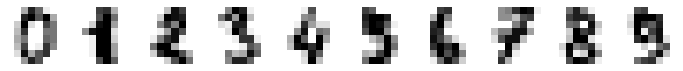

In [28]:
%matplotlib inline
from sklearn import datasets
X, y = datasets.load_digits(return_X_y=True)

fig = plt.figure(figsize=(12, 4))
for i in range(10):
    fig.add_subplot(1, 10, i+1)
    plt.imshow(X[i].reshape((8,8)), cmap=plt.cm.binary)
    plt.axis("off")
plt.show()

## Question

Appliquer une réduction de dimension non-linéaire à l’aide de UMAP pour
projeter les données en deux dimensions. Que constatez-vous du point de
vue de la séparation des différents groupes de chiffres?

UMAP peut également tenir compte de l’information contenue dans les
étiquettes de groupe lors du calcul des distances. Cela permet de
renforcer la séparation des *clusters* correspondant à des classes
différentes.

Pour ce faire, les méthodes `.fit()` et `.fit_transform()` de
l’objet `UMAP()` acceptent un paramètre optionnel `y` qui permet de
passer en argument les informations sur les groupes. Se référer à la
[documentation](https://umap-learn.readthedocs.io/en/latest/supervised.html)
pour plus de détails.

## Question

Appliquer une réduciton de dimension non-linéaire *supervisée* en
utilisant UMAP pour projeter les données en deux dimensions. Que
constatez-vous par rapport à l’approche non-supervisée utilisée
précédemment ?

### Validation du modèle

Une façon de valider la pertinence de la projection obtenue par UMAP est
de comparer les performances d’un classifieur par k-plus proches voisins
(*kNN*):

- sur les données d’origine (les images $ 8\times 8 $),  
- sur les données réduites (la projection dans le plan).  


Le classifieur *kNN* est disponible dans scikit-learn via le module
`sklearn.neighbors.KNeihgborsClassifier`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

La méthode `.fit` requiert une matrice d’observations `X` ainsi que
les étiquettes de classe `y`. Nous pouvons facilement utiliser sklearn
pour entraîner un *kNN* sur le jeu de données Digits, ici par exemple
avec $ k=10 $ :

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
print(knn.score(X, y))

### Question

En vous aidant de la
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
de la classe `KNeighborsClassifier` de scikit-learn, que renvoie la
méthode `.score()` ?

### Question

Appliquer une classification par les 10 plus proches voisins sur les
données Digits projetées par UMAP *non-supervisé*. Quel score
obtenez-vous ? Quelle conclusion pouvez-vous en tirer?

Comparer avec le même protocole mais appliqué aux données projetées via
t-SNE.

### Question

*(optionnel)* Comparer les temps de calcul de t-SNE et de UMAP dans les
mêmes conditions (même jeu de données, même machine, même dimension
cible). Pour un résultat plus représentatif d’une application sur des
données réelles, on utilisera le jeu de données MNIST (images
$ 28\times 28 $ en niveaux de gris). Dans Jupyter, les commandes
magiques `%%time` et `%%timeit` peuvent être utiles. Que
constatez-vous ?

In [33]:
from sklearn.datasets import fetch_openml
X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True)
# à compléter

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>